In [1]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs, the seed will always get the same value
np.random.seed(42)

X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0, 0.15, len(X))



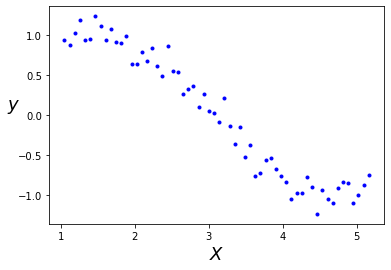

In [2]:
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);



In [3]:
X.shape, y.shape
X = X.reshape(-1, 1)
X.shape

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.001, random_state = 42))])
model_lasso.fit(X, y)

C:\Users\sltm-14\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015863565012693703, tolerance: 0.00371452009686764
  positive)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [4]:
y_pred = model_lasso.predict(X)

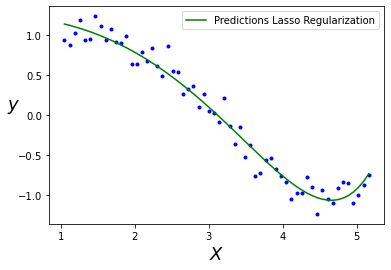

In [5]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);